# Analyze Results of Random Walk
## 2019 - 2023 for September 11, 2001 Attacks

In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from functools import reduce
from tqdm import tqdm

# pd.set_option('display.float_format', '{:e}'.format)

In [223]:
def read_and_rename_csv(file_path):
    """
    Reads random walk files from disk and properly names index column
    :param file_path: Path to file.
    :type file_path: str
    :return: Processed dataframe.
    :rtype: pandas Dataframe
    """
    df = pd.read_csv(file_path)
    df.rename(columns={"Unnamed: 0": "index"}, inplace=True)
    df["eig_cent_scaled"] = df["eig_cent"] * 1000000
    return df

def merge_dataframes(df_dict):
    """
    Merges dictionary of Dataframes into a single Dataframe, based on page (outer join).
    :param df_dict: Dictionary of dataframes
    :type df_dict: dict
    :return: Merged Dataframe
    :rtype: pandas Dataframe
    """
    return reduce(lambda left, right: pd.merge(left, right, on="page", how="outer"), df_dict.values())

def create_top_month_dict(top_dict, year):
    """
    Accepts a dictionary containing Dataframes with a subset of top eigenvector centrality pages in a month of clickstream data and adds a column for the month filled with 1, indicating the presence of that page in that month. This is preparation for creating a yearly heatmap with the presence of pages over months.
    :param top_dict: Dictionary of Dataframes with pages of top eigenvector centrality for a year.
    :type top_dict: dict
    :param year: The year in which the data was observed.
    :type year: str
    :return: Dictionary of enhanced Dataframes with pages of top eigenvector centrality for a year.
    :rtype: dict
    """
    top_month_dict = {}
    for month in range(1, 13):
        key = f"top_sept11_{year}{month:02d}"
        data = top_dict.get(key, {})
        month_df = pd.DataFrame({"page": data.get("page", []), f"{month:02d}": 1})
        top_month_dict[f"month_{month:02d}"] = month_df
    return top_month_dict

sept11_months = dict()
top_2019 = dict()

for month in range(1, 13):
    file_path = f"../output/random_walks/not_uniform_prob/2019-{month:02d}_sept11_~uniform.csv"
    df = read_and_rename_csv(file_path)
    sept11_months[f"sept11_2019{month:02d}"] = df

for k, df in sept11_months.items():
    top = df.nlargest(5, "eig_cent")
    top_2019[f"top_{k}"] = top


In [224]:
sept11_202309 = pd.read_csv("../output/random_walks/not_uniform_prob/2023-09_sept11_~uniform.csv")
sept11_202309.rename(columns={"Unnamed: 0": "index"}, inplace=True)

sept11_201902 = pd.read_csv("../output/random_walks/not_uniform_prob/2019-02_sept11_~uniform.csv")
sept11_201902.rename(columns={"Unnamed: 0": "index"}, inplace=True)

In [225]:
sept11_202309.head()

,index,page,eig_cent
0,0,Permian,0.000004
1,1,Thunder_and_Lightning_(album),0.000004
2,2,Daisy_chain_(electrical_engineering),0.000004
3,3,Corregidor,0.000004
4,4,Blue_Max,0.000004


In [226]:
sept11_202309.tail()

,index,page,eig_cent
276295,276295,The_Big_Snooze,0.000004
276296,276296,Kākāpō,0.000004
276297,276297,Tanner_Brown,0.000004
276298,276298,Sloughhouse,0.000004
276299,276299,Mustelidae,0.000004


In [227]:
sept11_202309["eig_cent_scaled"] = sept11_202309["eig_cent"] * 1000000
sept11_202309.head()

,index,page,eig_cent,eig_cent_scaled
0,0,Permian,0.000004,3.619254
1,1,Thunder_and_Lightning_(album),0.000004,3.619254
2,2,Daisy_chain_(electrical_engineering),0.000004,3.619254
3,3,Corregidor,0.000004,3.619254
4,4,Blue_Max,0.000004,3.619254


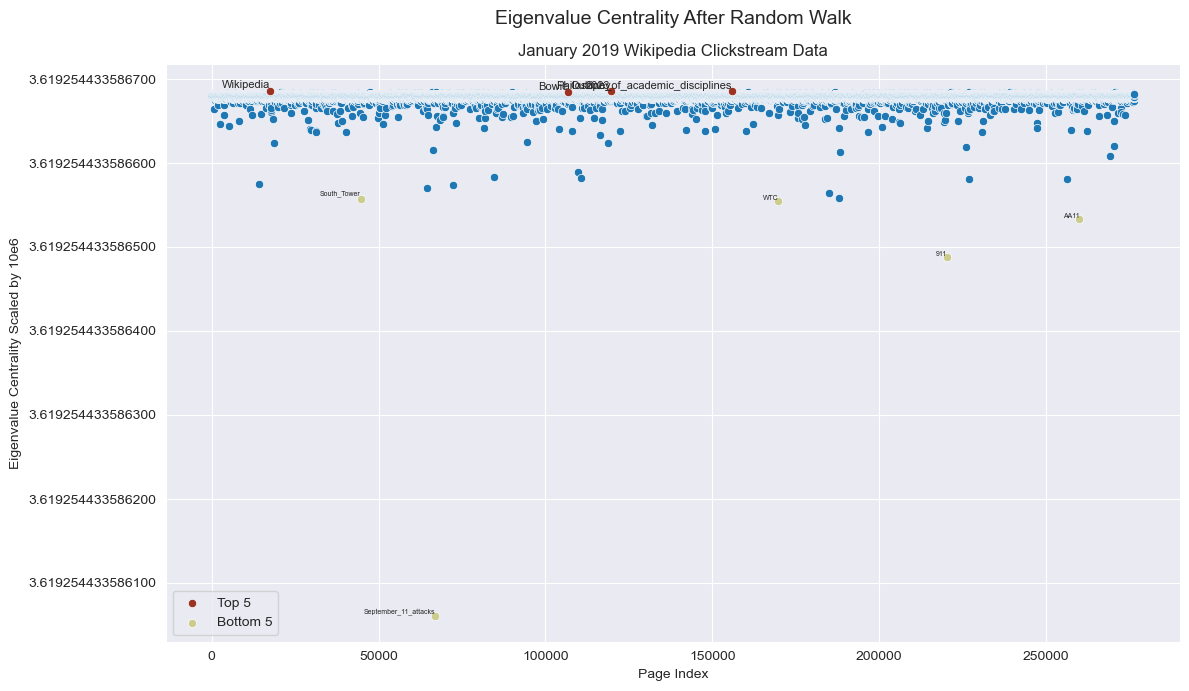

In [228]:
plt.figure(figsize=(12, 7))

sns.scatterplot(sept11_202309, x="index", y="eig_cent_scaled")


# Get top
top_5 = sept11_202309.nlargest(5, "eig_cent_scaled")
bottom_5 = sept11_202309.nsmallest(5, "eig_cent_scaled")

# Add labels
for idx, row in top_5.iterrows():
    plt.text(row["index"], row["eig_cent_scaled"], f"{row['page']}", ha="right", va="bottom", fontsize=8)

for idx, row in bottom_5.iterrows():
    plt.text(row["index"], row["eig_cent_scaled"], f"{row['page']}", ha="right", va="bottom", fontsize=5)
    
# Add colors
top_mask = sept11_202309['index'].isin(top_5['index'])
bottom_mask = sept11_202309['index'].isin(bottom_5['index'])
sns.scatterplot(x="index", y="eig_cent_scaled", data=sept11_202309[top_mask], color='#9a3324', label='Top 5')
sns.scatterplot(x="index", y="eig_cent_scaled", data=sept11_202309[bottom_mask], color='#cbcc8d', label='Bottom 5')

plt.grid(True, which="both")
decimal_places = 15  # Adjust as needed
plt.gca().yaxis.set_major_formatter(FormatStrFormatter(f"%.{decimal_places}f"))
plt.legend()
plt.ylabel("Eigenvalue Centrality Scaled by 10e6")
plt.xlabel("Page Index")
plt.suptitle("Eigenvalue Centrality After Random Walk", x=0.565, fontsize=14)
plt.title("January 2019 Wikipedia Clickstream Data")
plt.tight_layout()
plt.savefig("../output/plots/202309_eigs.svg", format="svg")
plt.show()

In [139]:
sept11_202309.sort_values(by="eig_cent", ascending=False)

,index,page,eig_cent,eig_cent_scaled
199507,199507,Flight_11,0.000004,4.1167
132525,132525,Main_Page,0.000004,4.1167
217500,217500,Ground_zero_(disambiguation),0.000004,4.1167
228555,228555,AA11,0.000004,4.1167
107368,107368,Hijackers_in_the_September_11_attacks,0.000004,4.1167
...,...,...,...,...
162382,162382,North_Tower,0.000004,4.1167
82915,82915,September_11,0.000004,4.1167
127689,127689,September_11_National_Day_of_Service,0.000004,4.1167
96519,96519,September_11_attacks_(disambiguation),0.000004,4.1167


In [140]:
sept11_202309["eig_cent"].min()

4.116700217773111e-06

In [141]:
sept11_202309["eig_cent"].max()

4.116700217773778e-06

## Create Heatmap

In [142]:
top_2019.keys()

dict_keys(['top_sept11_201901', 'top_sept11_201902', 'top_sept11_201903', 'top_sept11_201904', 'top_sept11_201905', 'top_sept11_201906', 'top_sept11_201907', 'top_sept11_201908', 'top_sept11_201909', 'top_sept11_201910', 'top_sept11_201911', 'top_sept11_201912'])

In [143]:
top_2019.get("top_sept11_201901")

,index,page,eig_cent,eig_cent_scaled
199507,199507,Flight_11,0.000004,4.1167
132525,132525,Main_Page,0.000004,4.1167
217500,217500,Ground_zero_(disambiguation),0.000004,4.1167
228555,228555,AA11,0.000004,4.1167
107368,107368,Hijackers_in_the_September_11_attacks,0.000004,4.1167


In [144]:
# jan2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201901")["page"], "jan": 1})
# feb2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201902")["page"], "feb": 1})
# mar2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201903")["page"], "mar": 1})
# apr2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201904")["page"], "apr": 1})
# may2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201905")["page"], "may": 1})
# jun2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201906")["page"], "jun": 1})
# jul2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201907")["page"], "jul": 1})
# aug2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201908")["page"], "aug": 1})
# sep2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201909")["page"], "sep": 1})
# oct2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201910")["page"], "oct": 1})
# nov2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201911")["page"], "nov": 1})
# dec2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201912")["page"], "dec": 1})
# 
# top_month_list = []
# top_month_list.extend([jan2019, feb2019, mar2019, apr2019, may2019, jun2019, jul2019, aug2019, sep2019, oct2019, nov2019, dec2019])



In [145]:
top_month_dict = create_top_month_dict(top_2019, "2019")

In [146]:
combine_top2019 = merge_dataframes(top_month_dict)
combine_top2019

,page,01,02,03,04,05,06,07,08,09,10,11,12
0,Flight_11,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN
1,Main_Page,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,Ground_zero_(disambiguation),1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AA11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hijackers_in_the_September_11_attacks,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,911,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0
6,September_11,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,List_of_terrorist_incidents_in_2001,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,List_of_the_deadliest_firefighter_disasters_in...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Judgment_Day_(2001),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


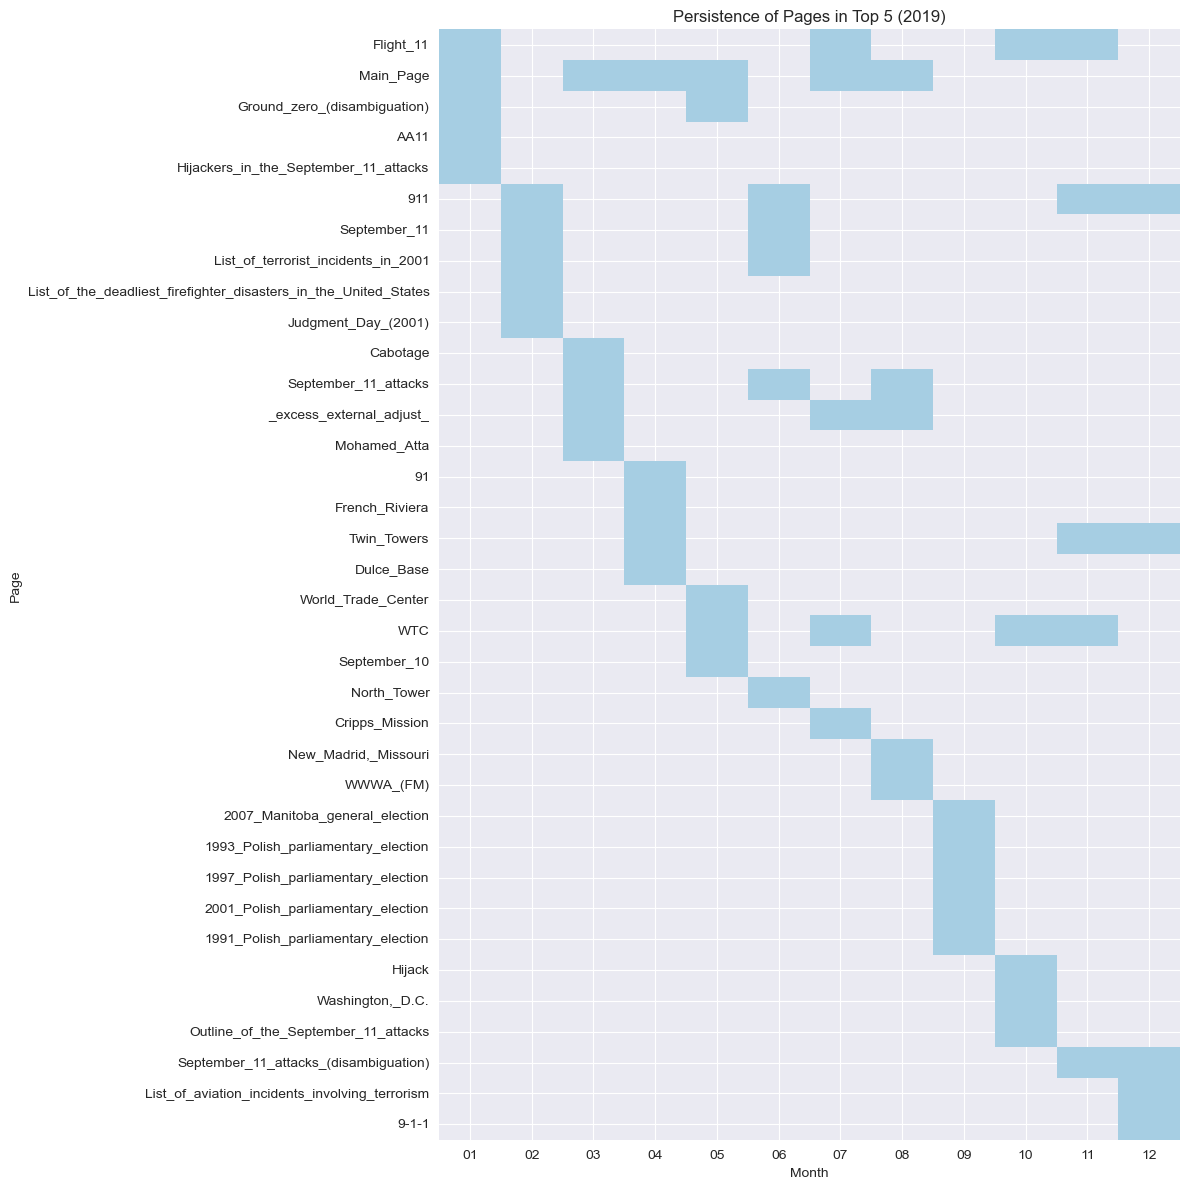

In [147]:
plt.figure(figsize=(12, 12))
sns.heatmap(combine_top2019.set_index("page"), cmap="Paired", cbar=False,)
plt.title("Persistence of Pages in Top 5 (2019)")
plt.xlabel("Month")
plt.ylabel("Page")
plt.tight_layout()
plt.savefig("../output/plots/2019_persist.pdf", format="pdf")
plt.show()

## Assess Intersection of Top 5 Across Years

In [176]:
# Define dates for files
start_year = 2019
end_year = 2023
missing = ["2023-12", "2023-11"]

date_list = []

for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        if f"{year:04d}-{month:02d}" not in missing:
            date_string = f"{year:04d}-{month:02d}"
            date_list.append(date_string)

top_eigs = dict()
for date in tqdm(date_list, desc="Loading Eigs Data"):
    # Load data
    file_path = f"../output/random_walks/not_uniform_prob/{date}_sept11_~uniform.csv"
    eig_data = read_and_rename_csv(file_path)
    top_5 = eig_data.nlargest(5, "eig_cent_scaled")
    top_eigs[date] = top_5


Loading Eigs Data: 100%|██████████| 58/58 [00:08<00:00,  7.20it/s]


In [209]:
top_eig_pages = pd.read_csv("../data/top_eig_pages.csv")
cols_keep = ["2019", "2020", "2021", "2022", "2023"]
top_eig_pages = top_eig_pages.loc[:, top_eig_pages.columns.isin(cols_keep)]


In [210]:
top_eig_pages

,2019,2020,2021,2022,2023
0,Flight_11,Christopher_Columbus,Main_Page,September_11_attacks,World_Trade
1,Main_Page,Paris,September_11_attacks_(disambiguation),911,Flight_11
2,Ground_zero_(disambiguation),Lisa_Lopes,911,September_11_attacks_(disambiguation),South_Tower
3,AA11,John_Krasinski,Saarinen,Twin_Towers,Ground_zero_(disambiguation)
4,Hijackers_in_the_September_11_attacks,Duke_University,Twin_Towers,September_11,WTC
...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN


In [211]:
common_elements_all_years = set(top_eig_pages['2019']) & set(top_eig_pages['2020']) & set(top_eig_pages['2021']) & set(top_eig_pages['2022']) & set(top_eig_pages['2023'])
common_elements_all_years = pd.Series(list(common_elements_all_years))


In [212]:
common_elements_all_years.dropna(inplace=True)

In [213]:
common_elements_all_years.to_csv("../output/random_walks/common_top_eig_pages.csv")

In [214]:
common_elements_all_years

0                         Main_Page
1              September_11_attacks
2                               911
3    2007_Manitoba_general_election
4                      September_11
6                               WTC
7      Ground_zero_(disambiguation)
8                         Flight_11
9                       Twin_Towers
dtype: object